# 📊 Final Report – Model Evaluation & Comparison

---

## Slide 1: Business Problem
"Predicting cause of death in heart failure patients enables early intervention and personalized care strategies."

## Slide 2: Technical Problem & Approach
"Multi-class classification (e.g., sudden cardiac death, heart failure, other) using clinical and ECG-derived features."
"Applied models: Random Forest, XGBoost, Voting Classifier Ensemble."


## Slide 3: Dataset Overview

- Original dataset: **MUSIC (MUerte SÚbita en Insuficiencia Cardiaca)**
- Includes **992 patients** with chronic heart failure
- Contains **103 variables**, including:
  - Demographics
  - Clinical history
  - ECG-derived features
  - Medications and lab data
- Multi-class target: `Cause_of_death` (sudden cardiac death, heart failure, other)

➡️ A reduced version was used for modeling, containing selected features and cleaned records.

## Slide 4: Data Preprocessing
- Missing values handled
- SMOTE applied to balance classes
- Feature selection based on model importance

## Slide 5: Model Training & Evaluation
```python
# Accuracy, F1, AUROC for Random Forest & Voting Classifier
print(results_df.round(4))
```
- Voting Classifier outperformed individual models
- GridSearchCV for tuning


## Slide 6: ROC Curve Comparison
```python
plt.plot(...)
plt.savefig("../img/Receiver_Operating_Characteristic.png")

## Slide 7: Conclusion & Next Steps
- VotingClassifier is reliable and interpretable
- Next: SHAP explainability, live deployment, and external validation

## Thank you!
"Feel free to reach out for code, documentation, or a walk-through."


📊 Model Performance Summary:


,Model,Accuracy,F1-Score,AUROC
0,Random Forest,0.8442,0.8396,0.9674
1,Voting Classifier,0.8543,0.8475,0.9713


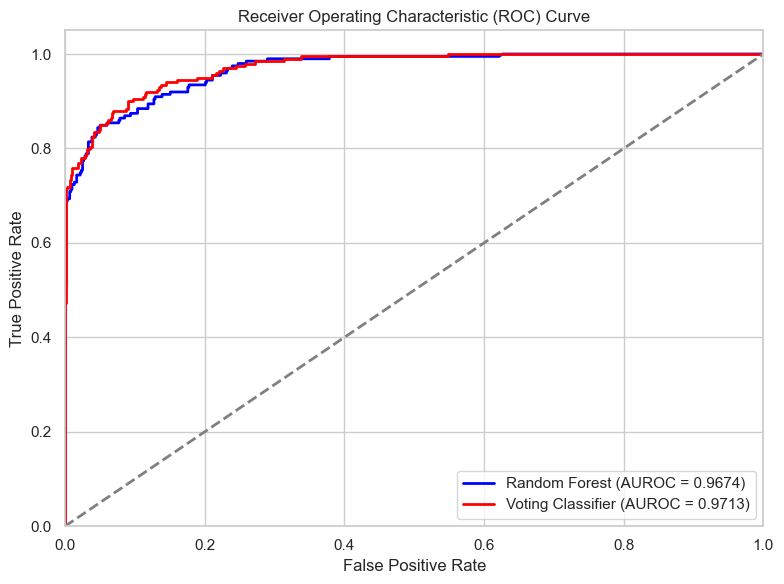

In [1]:
# Code follows below ⬇️

# 1. Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.metrics import (
    accuracy_score, f1_score, roc_auc_score,
    classification_report, roc_curve, auc
)

sns.set(style="whitegrid")

# 2. Load Data & Models
X_test = pd.read_csv("../data/test_filtered2.csv", sep=";")
y_test = X_test.pop("Cause_of_death")

rf_model = joblib.load("../models/random_forest_best.pkl")
voting_clf = joblib.load("../models/voting_classifier.pkl")

# 3. Predictions & Metrics
y_pred_rf = rf_model.predict(X_test)
y_pred_voting = voting_clf.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf, average="weighted")

accuracy_voting = accuracy_score(y_test, y_pred_voting)
f1_voting = f1_score(y_test, y_pred_voting, average="weighted")

# 4. AUROC
from sklearn.preprocessing import label_binarize
classes = np.unique(y_test)
y_test_bin = label_binarize(y_test, classes=classes)

proba_rf = rf_model.predict_proba(X_test)
proba_voting = voting_clf.predict_proba(X_test)

fpr_rf, tpr_rf, _ = roc_curve(y_test_bin.ravel(), proba_rf.ravel())
roc_auc_rf = auc(fpr_rf, tpr_rf)

fpr_voting, tpr_voting, _ = roc_curve(y_test_bin.ravel(), proba_voting.ravel())
roc_auc_voting = auc(fpr_voting, tpr_voting)

# 5. Table of Results
results_df = pd.DataFrame({
    "Model": ["Random Forest", "Voting Classifier"],
    "Accuracy": [accuracy_rf, accuracy_voting],
    "F1-Score": [f1_rf, f1_voting],
    "AUROC": [roc_auc_rf, roc_auc_voting]
})

print("\n📊 Model Performance Summary:")
display(results_df.round(4))

# 6. ROC Plot
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='blue', lw=2, label=f"Random Forest (AUROC = {roc_auc_rf:.4f})")
plt.plot(fpr_voting, tpr_voting, color='red', lw=2, label=f"Voting Classifier (AUROC = {roc_auc_voting:.4f})")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.tight_layout()
plt.savefig("../img/Receiver_Operating_Characteristic.png")
plt.show()
